In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/pulsar_stars.csv')
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
scaler = StandardScaler()

In [5]:
data = data[[x for x in data.columns if x != 'target_class']]
data.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [6]:
data_rescaled = scaler.fit_transform(data)

In [7]:
data_rescaled_manually = (data - np.mean(data)) / np.std(data)

In [8]:
np.sum(data_rescaled - data_rescaled_manually.values)

1.92920706994004e-10

In [9]:
scaler = MinMaxScaler()

In [10]:
data_rescaled = scaler.fit_transform(data)

In [11]:
data_rescaled_manually = (data - np.min(data)) / (np.max(data) - np.min(data))

In [12]:
np.sum(data_rescaled - data_rescaled_manually.values)

-3.7772011436860726e-13

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA()

In [15]:
pca.fit(data_rescaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
pca.explained_variance_ratio_

array([0.58134036, 0.23916108, 0.08041285, 0.04008327, 0.03026194,
       0.02546073, 0.00174363, 0.00153615])

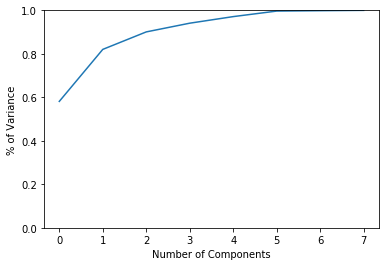

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('% of Variance')
plt.ylim([0,1])
plt.show();

In [18]:
np.cumsum(pca.explained_variance_ratio_) * 100

array([ 58.13403578,  82.05014356,  90.09142889,  94.09975569,
        97.1259492 ,  99.67202221,  99.84638527, 100.        ])

In [19]:
pca = PCA(n_components=5)
pd.DataFrame(pca.fit_transform(data_rescaled))

,0,1,2,3,4
0,-0.138358,-0.160938,-0.026662,0.058043,0.022612
1,-0.127223,0.016528,0.028527,0.174380,-0.042755
2,-0.019440,0.063518,-0.080879,-0.050851,0.018897
3,-0.102257,-0.163929,-0.043828,0.086351,0.013648
4,-0.157955,0.215701,0.083672,-0.023529,-0.023047
5,-0.098238,0.114750,-0.003675,0.055004,-0.011851
6,-0.338232,0.113971,0.286613,-0.042845,-0.069527
7,-0.210343,0.026370,0.053683,-0.123844,0.031610
8,-0.108118,0.022525,-0.017222,0.103652,0.002127
9,0.004705,0.042061,-0.079525,-0.062185,0.012676
